In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob

In [35]:
folder = "/home/jf/data/test"

In [39]:
files_names = list(glob.glob(folder+ "/ImagesGroundRemoved/*.tif"))
files_names = [filename.split('/')[-1].replace("_max.tif", '') for filename in files_names]
files_names


['PUNKTSKY_00005_1km_6146_468',
 'PUNKTSKY_00005_1km_6219_494',
 'PUNKTSKY_00005_1km_6161_465',
 'PUNKTSKY_00005_1km_6205_513',
 'PUNKTSKY_00005_1km_6204_505',
 'PUNKTSKY_00005_1km_6167_473',
 'PUNKTSKY_00005_1km_6167_475',
 'PUNKTSKY_00005_1km_6167_474',
 'PUNKTSKY_00005_1km_6162_472',
 'PUNKTSKY_00005_1km_6221_452',
 'PUNKTSKY_00005_1km_6220_495',
 'PUNKTSKY_00005_1km_6134_518',
 'PUNKTSKY_00005_1km_6168_458',
 'PUNKTSKY_00005_1km_6211_474',
 'PUNKTSKY_00005_1km_6163_472']

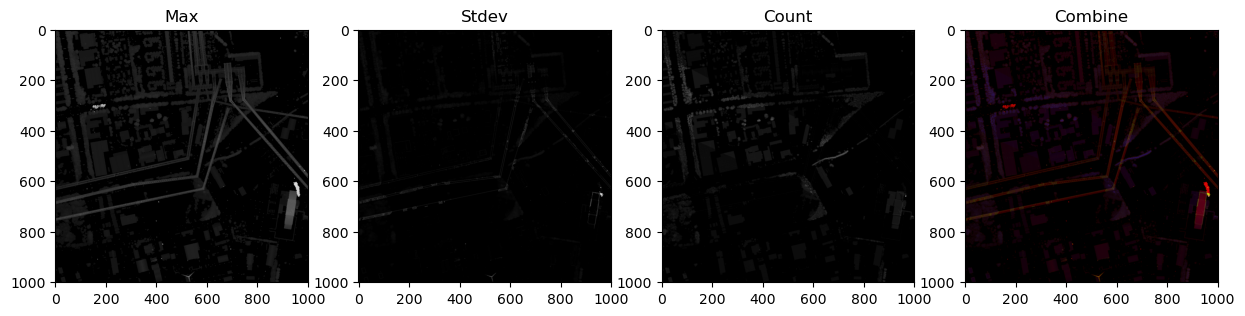

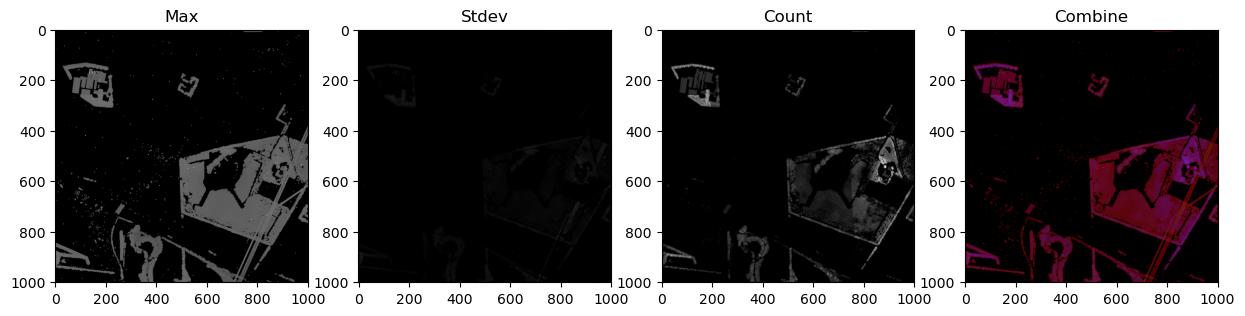

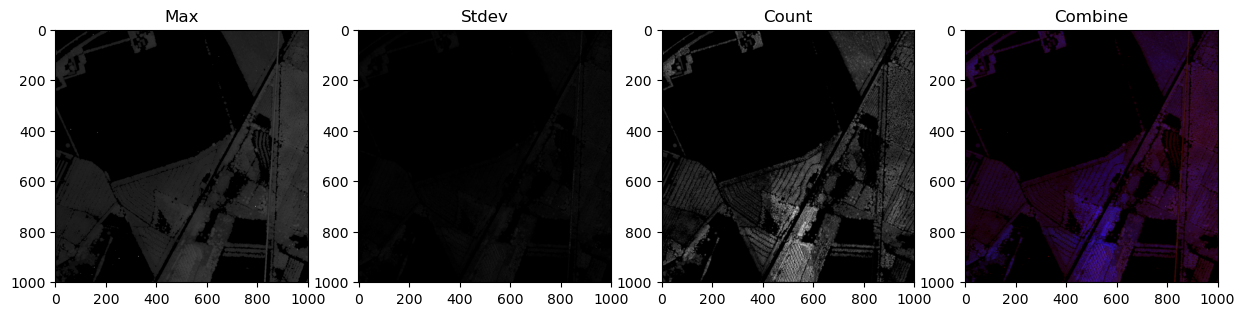

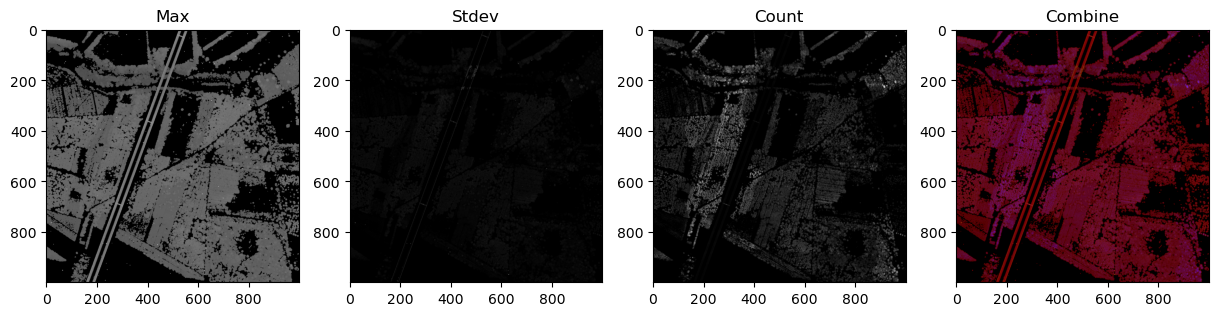

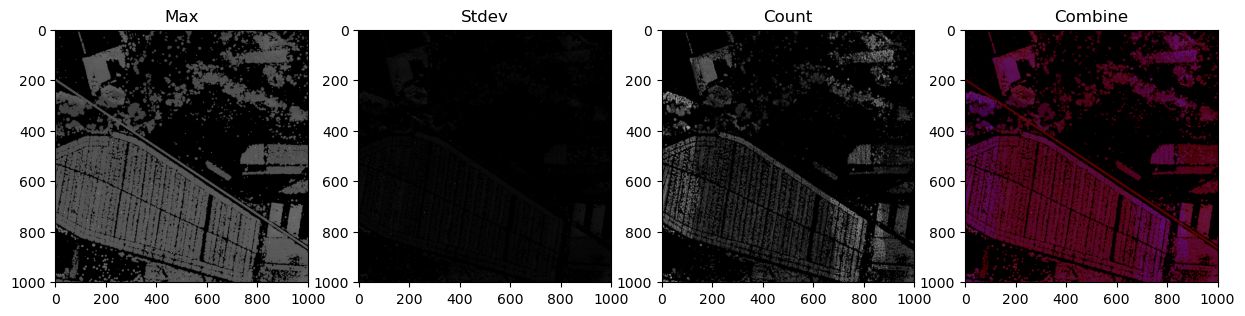

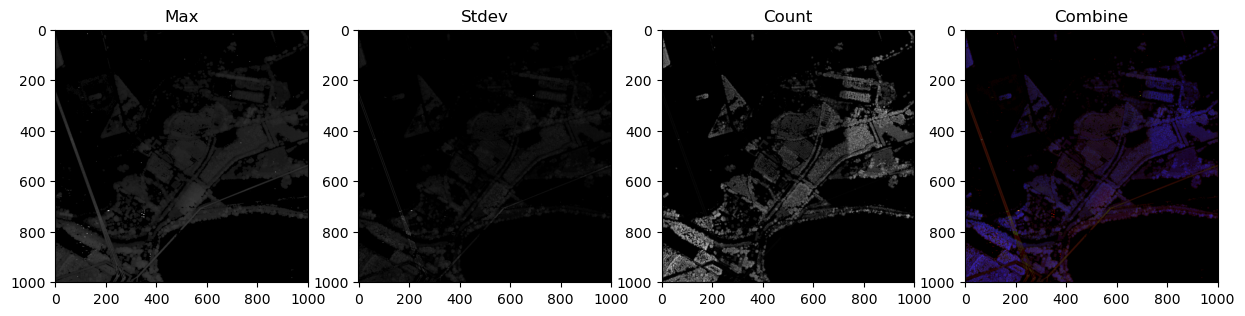

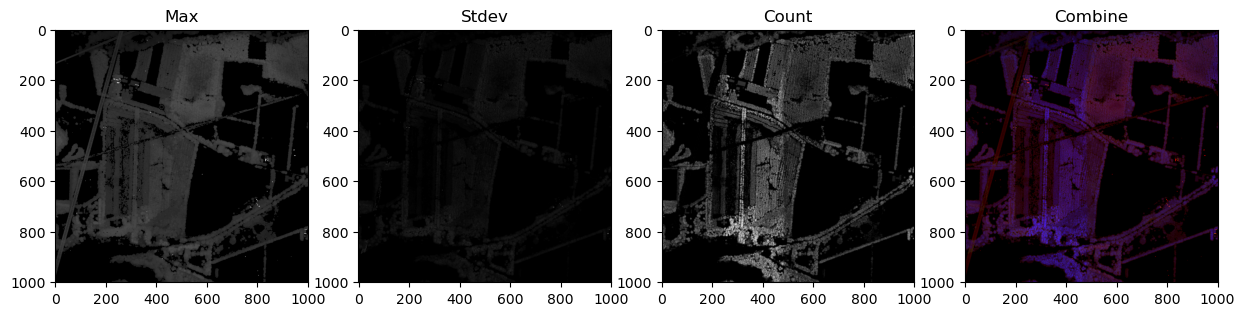

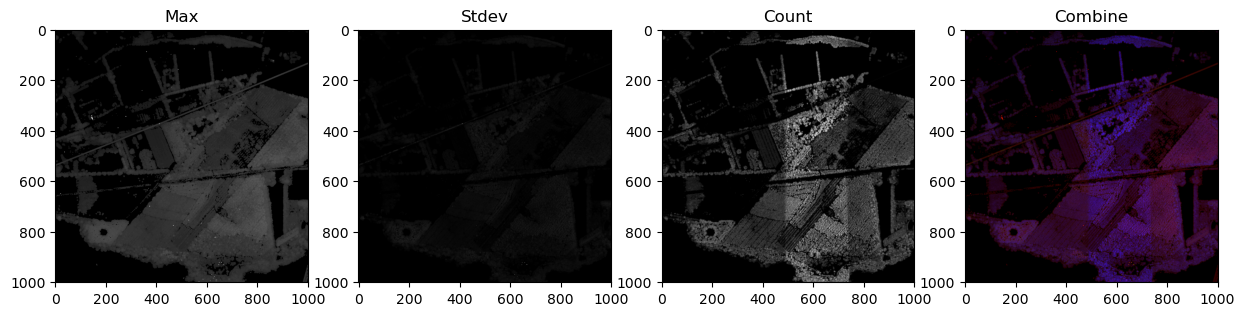

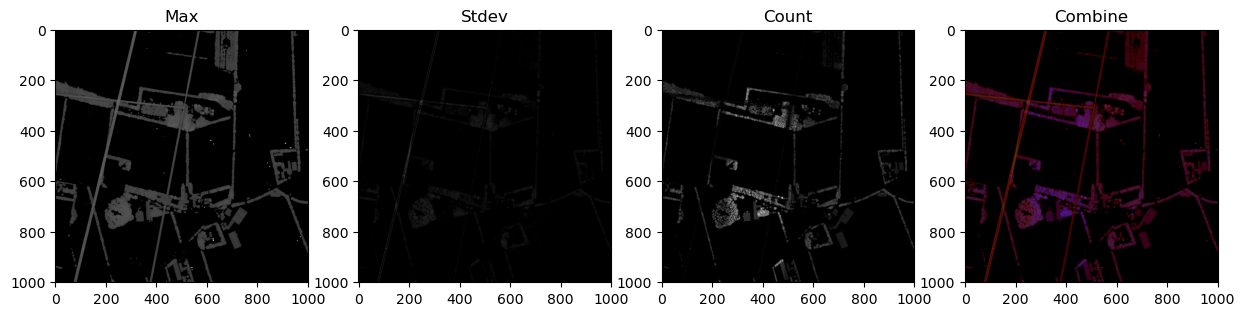

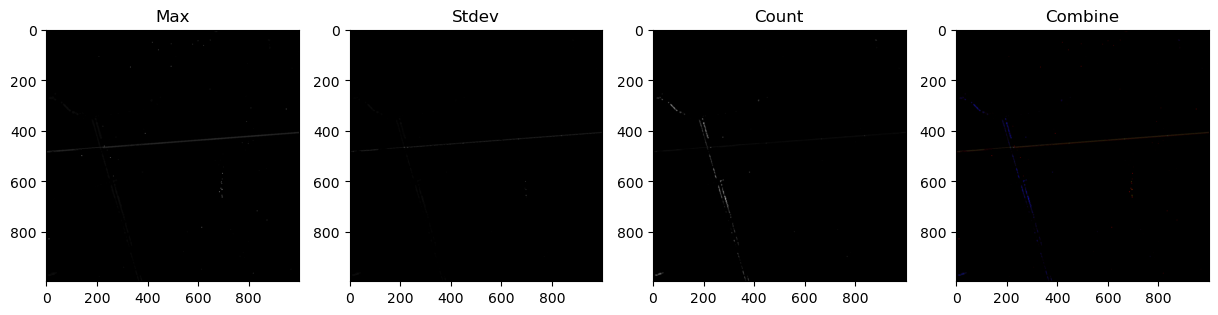

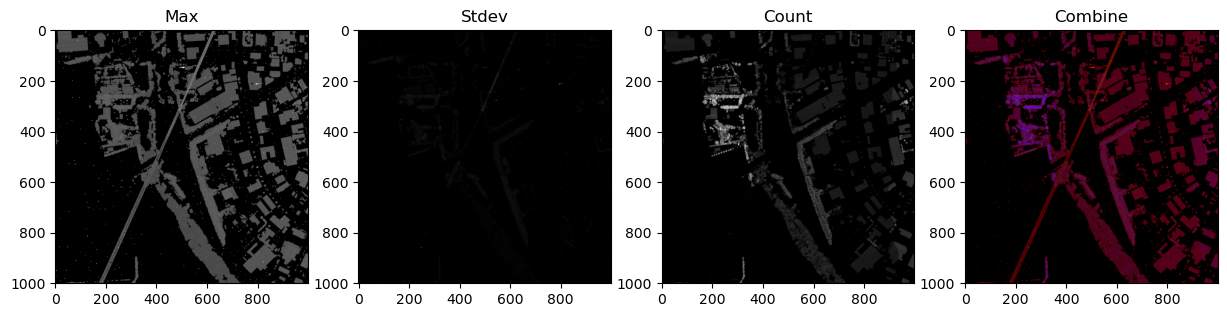

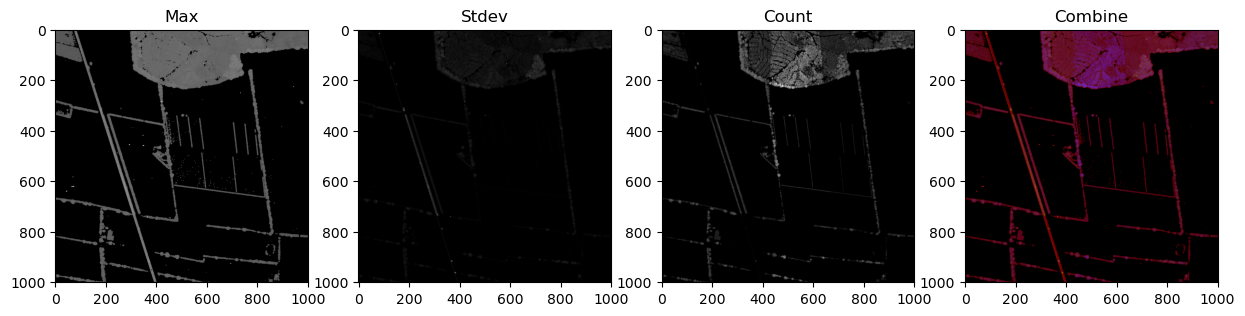

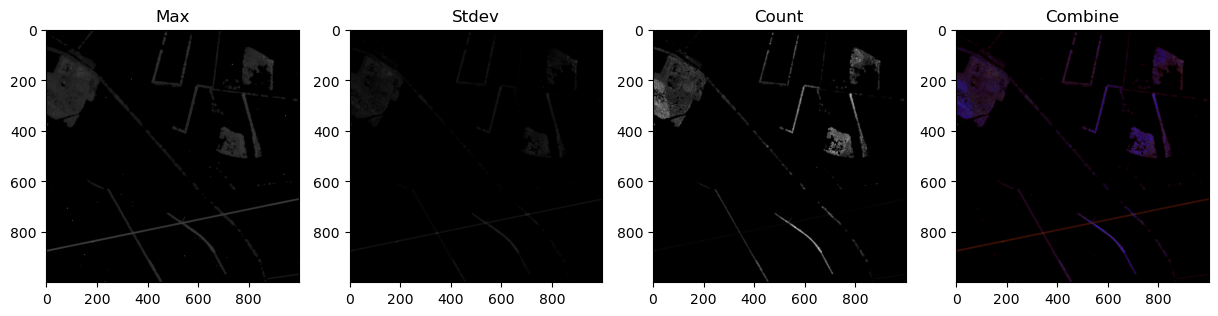

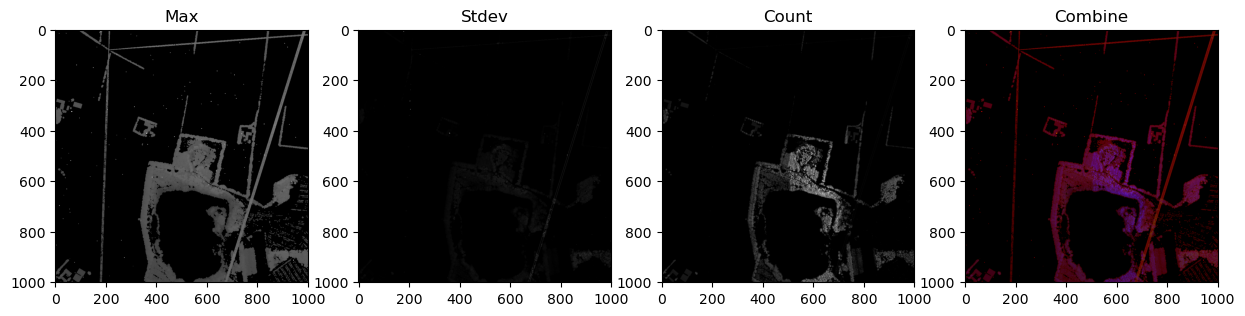

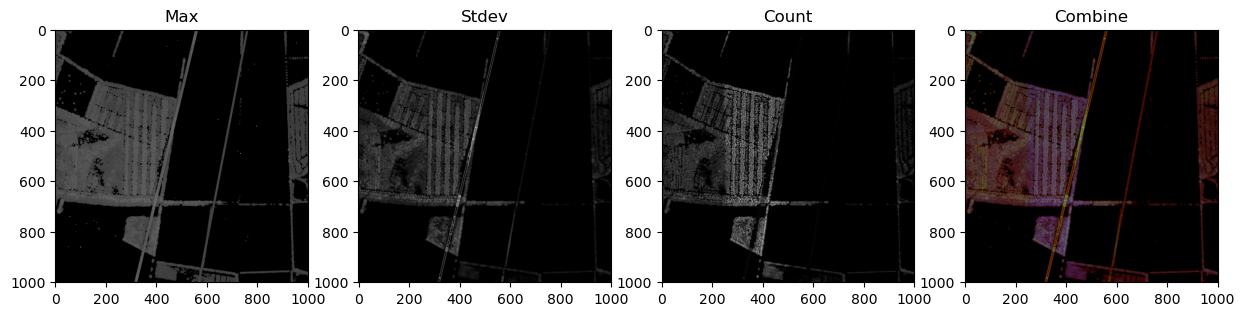

In [45]:
for filename in files_names:
    max_image = cv2.imread(f'{folder}/ImagesGroundRemoved/{filename}_max.tif', cv2.IMREAD_UNCHANGED)
    max_image = np.where(max_image >= 0, max_image, 0)
    max_image = max_image/np.max(max_image)
    max_image = (max_image*255).astype(np.uint8)


    std_image = cv2.imread(f'{folder}/ImagesGroundStdevRemoved/{filename}_stdev.tif', cv2.IMREAD_UNCHANGED)
    std_image = np.where(std_image >= 0, std_image, 0)
    std_image = std_image/np.max(std_image)
    std_image = (std_image*255).astype(np.uint8)

    count_image = cv2.imread(f'{folder}/ImagesGroundCountRemoved/{filename}_count.tif', cv2.IMREAD_UNCHANGED)
    count_image = np.where(count_image >= 0, count_image, 0)
    count_image = count_image/np.max(count_image)
    count_image = (count_image*255).astype(np.uint8)


    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(15,15))
    ax0.set_title('Max')
    ax0.imshow(max_image, cmap='gray')
    ax1.set_title('Stdev')
    ax1.imshow(std_image, cmap='gray')
    ax2.set_title('Count')
    ax2.imshow(count_image, cmap='gray')
    arrays = [max_image, std_image, count_image]
    staked_image = np.stack(arrays, axis=0).transpose((1, 2, 0))
    ax3.set_title('Combine')
    ax3.imshow(staked_image)


    #ax0.axis('off')
    #ax1.axis('off')
    #ax2.axis('off')
    plt.show()
